## Introduction
Airbnb is one of the hottest startups in our time. Founded after the financial crisis in 2008, the company solved the problem of matching unoccupied and unused apartments / rooms / beds with the demand for such during busy seasons, when hotel rooms where fully booked or unaffordable.

After its inception and scaling, the company became more valuable than established hotel chains such as Hilton or Marriott. Today, the platform offers many budding entrepreneurs or hobby hosts an opportunity to earn money by offering rooms or apartments. The service is offered worldwide.

i'm interested in the impact of airbnb on the market in france.
Thanks to the web http://insideairbnb.com/index.html, i could extract current market data of Airbnb in the paris real estate market.

This analysis and subsequent communication is part of the Data Science Nanodegree from Udacity and, is my first real contribution in Data Science to the wider community that i am about to share. Leave feedback on further questions or potential improvements. It is much appreciated

### Data

The data is provided by http://insideairbnb.com/index.html and consists of three sets:

Listings data with information on hosts, prices, ratings, etc.
Calendar data with occupancy rates
Reviews with detailed reviews per listing

In [1]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline
import seaborn as sb
import datetime
sb.set()

In [2]:
listings_df = pd.read_csv('data/listings20.csv')
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2577,Loft for 4 by Canal Saint Martin,2827,Karine,NaN,Entrepôt,48.86993,2.36251,Entire home/apt,125,3,1,2019-01-02,0.05,1,321
1,3109,zen and calm,3631,Anne,NaN,Observatoire,48.83349,2.31852,Entire home/apt,60,2,9,2019-10-24,0.19,1,365
2,4886,Country-Style Studio Hip Area FREE CRUISE & WIFI,6792,Ryan Of Cobblestone,NaN,Popincourt,48.86528,2.37115,Entire home/apt,89,3,25,2019-05-06,0.18,11,0
3,4890,Quiet Historic & Cute +Free Cruise,6792,Ryan Of Cobblestone,NaN,Temple,48.86409,2.35651,Entire home/apt,103,4,23,2020-09-07,0.21,11,72
4,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85100,2.35869,Entire home/apt,48,1,225,2020-08-08,1.64,1,76


## Listings data

In [3]:
listings_df.shape

(66334, 16)

In [4]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66334 entries, 0 to 66333
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              66334 non-null  int64  
 1   name                            66270 non-null  object 
 2   host_id                         66334 non-null  int64  
 3   host_name                       66314 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   66334 non-null  object 
 6   latitude                        66334 non-null  float64
 7   longitude                       66334 non-null  float64
 8   room_type                       66334 non-null  object 
 9   price                           66334 non-null  int64  
 10  minimum_nights                  66334 non-null  int64  
 11  number_of_reviews               66334 non-null  int64  
 12  last_review                     

In [5]:
# drop the null value
listings_df.dropna(axis=1,inplace=True)
listings_df.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2577,2827,Entrepôt,48.86993,2.36251,Entire home/apt,125,3,1,1,321
1,3109,3631,Observatoire,48.83349,2.31852,Entire home/apt,60,2,9,1,365
2,4886,6792,Popincourt,48.86528,2.37115,Entire home/apt,89,3,25,11,0
3,4890,6792,Temple,48.86409,2.35651,Entire home/apt,103,4,23,11,72
4,5396,7903,Hôtel-de-Ville,48.85100,2.35869,Entire home/apt,48,1,225,1,76


In [6]:
listings_df.columns

Index(['id', 'host_id', 'neighbourhood', 'latitude', 'longitude', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [7]:
# check neighbourhood 
listings_df['neighbourhood'].unique()

array(['Entrepôt', 'Observatoire', 'Popincourt', 'Temple',
       'Hôtel-de-Ville', 'Opéra', 'Louvre', 'Buttes-Montmartre', 'Élysée',
       'Gobelins', 'Luxembourg', 'Buttes-Chaumont', 'Panthéon',
       'Palais-Bourbon', 'Reuilly', 'Bourse', 'Ménilmontant', 'Vaugirard',
       'Batignolles-Monceau', 'Passy'], dtype=object)

In [8]:
# Transform price columns to floats
listings_df['price'] = listings_df.price.replace('[\$,]', '', regex=True).astype(float)

## Calendar data

In [9]:
# reading dataframe
calendar20_df = pd.read_csv('data/calendar20.csv')
calendar19_df = pd.read_csv('data/calendar19.csv')

calendar20_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2577,2020-10-19,f,$125.00,$125.00,3.0,1125.0
1,73533,2020-10-20,t,$95.00,$95.00,2.0,1125.0
2,73533,2020-10-21,t,$95.00,$95.00,2.0,1125.0
3,73533,2020-10-22,t,$95.00,$95.00,2.0,1125.0
4,73533,2020-10-23,t,$95.00,$95.00,2.0,1125.0


In [10]:
# checking dataframe
calendar20_df.shape

(24214662, 7)

In [11]:
# extract years, month and days
calendar19_df['year'] = pd.DatetimeIndex(calendar19_df.date).year
calendar19_df['month'] = pd.DatetimeIndex(calendar19_df.date).month
calendar19_df['day'] = pd.DatetimeIndex(calendar19_df.date).day

# transform price columns to floats
calendar19_df['price'] = calendar19_df.price.replace('[\$,]', '', regex=True).astype(float)
calendar19_df['adjusted_price'] = calendar19_df.adjusted_price.replace('[\$,]', '', regex=True).astype(float)

calendar19_df['date'] = pd.to_datetime(calendar19_df['date'])
calendar19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24168279 entries, 0 to 24168278
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  float64       
 6   maximum_nights  float64       
 7   year            int64         
 8   month           int64         
 9   day             int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 1.8+ GB


In [12]:
# extract years, month and days
calendar20_df['year'] = pd.DatetimeIndex(calendar20_df.date).year
calendar20_df['month'] = pd.DatetimeIndex(calendar20_df.date).month
calendar20_df['day'] = pd.DatetimeIndex(calendar20_df.date).day

# transform price columns to floats
calendar20_df['price'] = calendar20_df.price.replace('[\$,]', '', regex=True).astype(float)
calendar20_df['adjusted_price'] = calendar20_df.adjusted_price.replace('[\$,]', '', regex=True).astype(float)

calendar20_df['date'] = pd.to_datetime(calendar20_df['date'])
calendar20_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24214662 entries, 0 to 24214661
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  float64       
 6   maximum_nights  float64       
 7   year            int64         
 8   month           int64         
 9   day             int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 1.8+ GB


## review data

In [13]:
# checking reviews dataframe
reviews_df = pd.read_csv('data/reviews20.csv')
reviews_df.head()

,listing_id,date
0,2577,2019-01-02
1,3109,2016-12-27
2,3109,2016-12-28
3,3109,2017-10-28
4,3109,2017-11-03


In [14]:
# extract years, month and days
reviews_df['year'] = pd.DatetimeIndex(reviews_df.date).year
reviews_df['month'] = pd.DatetimeIndex(reviews_df.date).month
reviews_df['day'] = pd.DatetimeIndex(reviews_df.date).day
reviews_df['date'] = pd.to_datetime(reviews_df['date'])
reviews_df.head()

,listing_id,date,year,month,day
0,2577,2019-01-02,2019,1,2
1,3109,2016-12-27,2016,12,27
2,3109,2016-12-28,2016,12,28
3,3109,2017-10-28,2017,10,28
4,3109,2017-11-03,2017,11,3


## Data Exploration

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text yticklabel objects>)

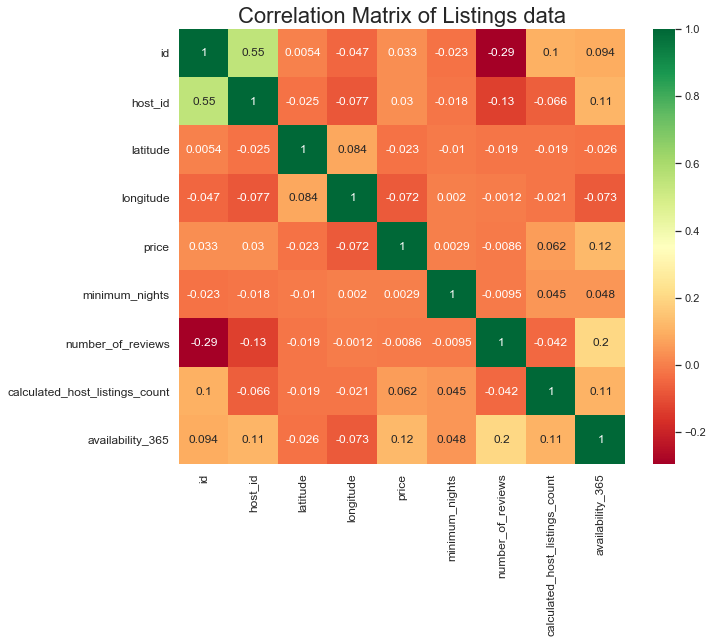

In [15]:
# Make Correlation Matrix of Listings data

# Plot histogram
plt.figure(figsize=(10,8))
sb.heatmap(listings_df.corr(),
          cmap = 'RdYlGn',
          annot= True,
          xticklabels=listings_df.corr().columns,
           yticklabels=listings_df.corr().columns
          )
# Decorations
plt.title('Correlation Matrix of Listings data', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text yticklabel objects>)

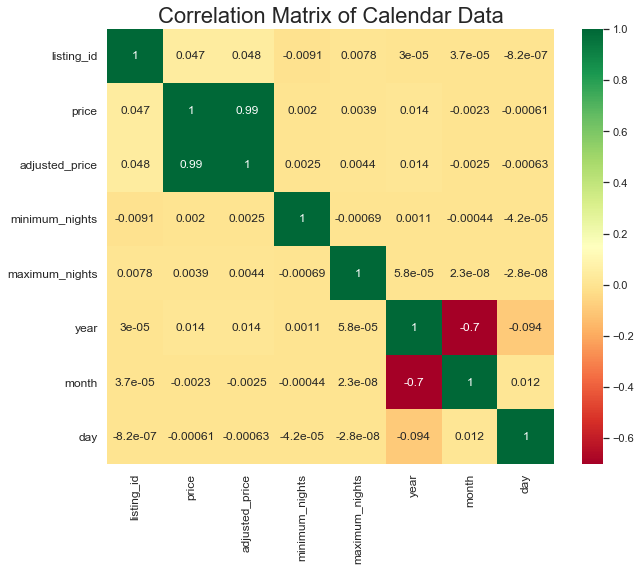

In [16]:
# Visualize Correlation Matrix of Calendar Data

# Plot histogram 
plt.figure(figsize=(10,8))
sb.heatmap(calendar20_df.corr(),
          xticklabels=calendar20_df.corr().columns,
          yticklabels=calendar20_df.corr().columns,
           cmap = 'RdYlGn',
          annot= True,
          )
# Decorations
plt.title('Correlation Matrix of Calendar Data', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

## Business Understanding 

I have some question about the provided the data.

 - Which neighbourhoods offer the most Airbnb listings?
 - Which neighbourhoods is economical to stay?
 - Can I save a lot of money compared to the usual hotel room?
 - Which month are best to travel regarding occupancy and prices?
 - How does Covid-19 affect the market for Airbnb listings in Paris?

#### How are prices distributed for Airbnb Listings in Paris 2020? Can i save money compared to the usual hotel room?

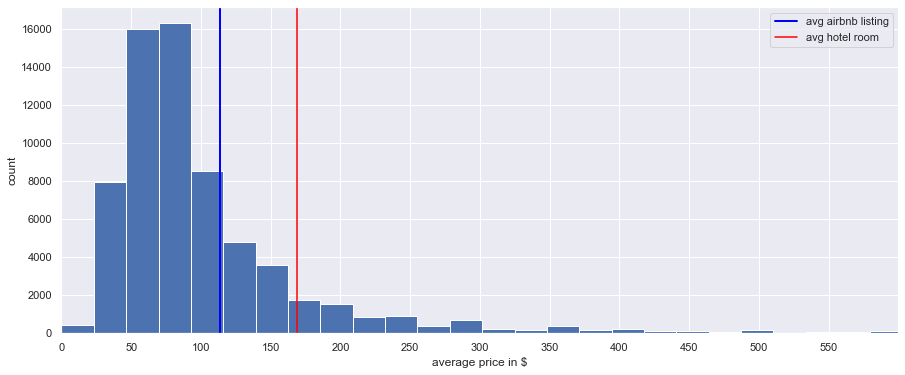

In [17]:
# Visualize the distribution of price of Airbnb Paris listings

# Data preparation
mean_price_for_listing = listings_df.groupby('id')['price'].mean()
avg_price_hotel_room = 169

#make plot_bar
plt.figure(figsize=(15,6))
plt.hist(mean_price_for_listing, bins=500)
plt.xlim([0,600])
plt.axvline(listings_df.price.mean(), linewidth=2, color='blue', label='avg airbnb listing')
plt.axvline(avg_price_hotel_room, color='red', label='avg hotel room')
plt.xlabel('average price in $')
plt.ylabel('count')
plt.xticks(ticks=np.arange(0, 600, 50))
plt.legend(loc='best')
plt.show()

#### Observation:
 - Airbnb listings in paris are on average cheaper than hotel rooms(169 euro per night).
 - Most listings in paris are provided between 50 - 75 euro per night
 - As a results, The average price of Airbnb Paris is 125 euro. Airbnb service could help us save a lot of money compared to usual hotel room.
 

### Which Neighbourhood offer the most airbnb listings?

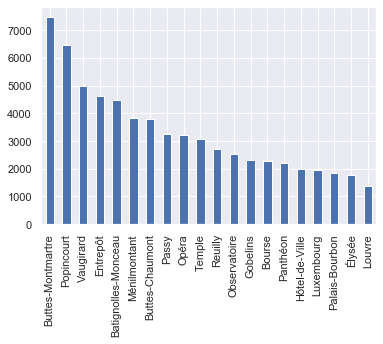

In [18]:
# Visualize the count of listings on neighborhood
listings_df['neighbourhood'].value_counts().plot.bar()

### Which neighbourhood is economical to stay?

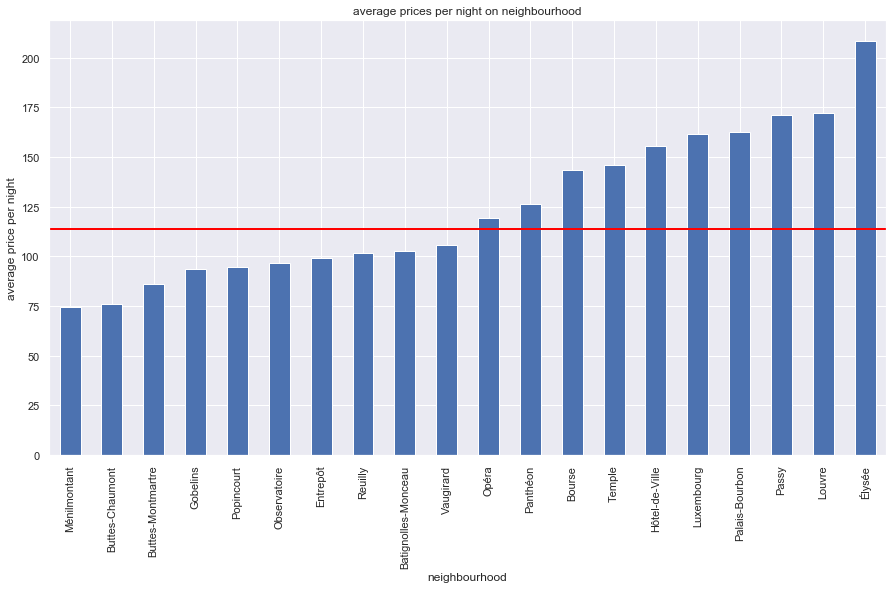

In [19]:
# Visalize  average price per night on neighbourhood
fig, ax = plt.subplots(figsize=(15,8))
listings_df.groupby(['neighbourhood'])['price'].mean().sort_values().plot.bar(ax=ax)
plt.xlabel('neighbourhood')
plt.ylabel('average price per night')
plt.title('average prices per night on neighbourhood')
plt.axhline(listings_df.price.mean(), linewidth=2, color='red')
plt.show()

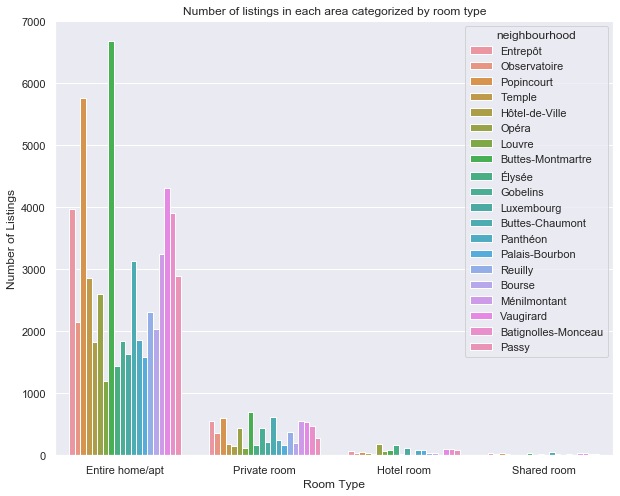

In [38]:
# Visualize the number of listings in each area categorized by room type
# Data Preparation
room_type = listings_df['room_type'].unique().tolist()
neighbor = listings_df['neighbourhood'].unique().tolist()

# make plot_bar
plt.figure(figsize=(10,8))
sb.countplot(data = listings_df, 
            x = 'room_type', hue = 'neighbourhood',
            order = room_type, hue_order = neighbor)
plt.title('Number of listings in each area categorized by room type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()

### observation:
 - It look like the area nearby Montmarte offers most airbnb listings.
 - Compared to reservate hotel room, It's more economical to use Airbnb service in Paris. 
 - Most Airbnb Paris provide Entire home or apartment type. 
 - From above, Montmarte, popincourt and vaugirard would be reasonable destination to save my budget and it is easy to find Airbnb room in that area.

#### Which month are best to travel regarding occupancy and prices?

In [21]:
# checking calendar dataframe
calendar20_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,year,month,day
0,2577,2020-10-19,f,125.0,125.0,3.0,1125.0,2020,10,19
1,73533,2020-10-20,t,95.0,95.0,2.0,1125.0,2020,10,20
2,73533,2020-10-21,t,95.0,95.0,2.0,1125.0,2020,10,21
3,73533,2020-10-22,t,95.0,95.0,2.0,1125.0,2020,10,22
4,73533,2020-10-23,t,95.0,95.0,2.0,1125.0,2020,10,23


In [37]:
# create the function to make plot
def plot_occupancy(calendar_df):
    '''
    returns a plot-bar of number of booked and available listings per month
    
    input:
    - calendar_df: calendar dataframe 
    output:
    - plot: the plot visualize the number of booked and availiable listings
    '''
      
    booked_year = calendar_df[calendar_df['available']=='f'].groupby('month')['listing_id'].count()
    available_year = calendar_df[calendar_df['available']=='t'].groupby('month')['listing_id'].count()
    
    N=12
    ind= np.arange(N)
    
    #make a plot_bar
    plt.figure(figsize=(12,5))
    plot_booked = plt.bar(ind, booked_year)
    plot_available = plt.bar(ind, available_year, bottom=booked_year)
    
    plt.xlabel('Month')
    plt.ylabel('Number of Listings')
    plt.title('Number of Paris Airbnb Listings each month for year')
    plt.xticks(ind, np.arange(1,13,1))
    plt.legend((plot_booked[0],plot_available[0]), ('Booked','Available'))
    
    return plt.show()
    
    

#### Number of listings per month in 2020

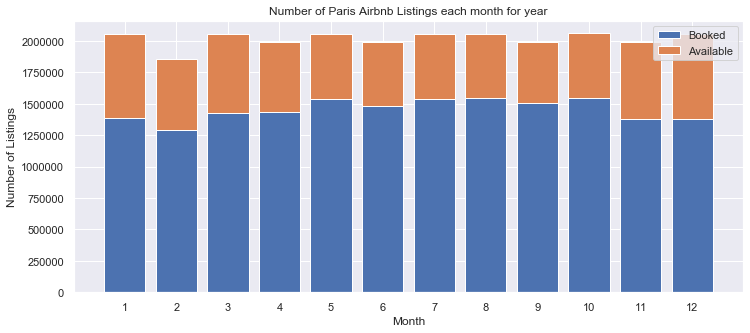

In [35]:
# use the function to visualize the number of booked and available listings per month in 2020
plot_occupancy(calendar20_df)

#### number of listings per month in 2019

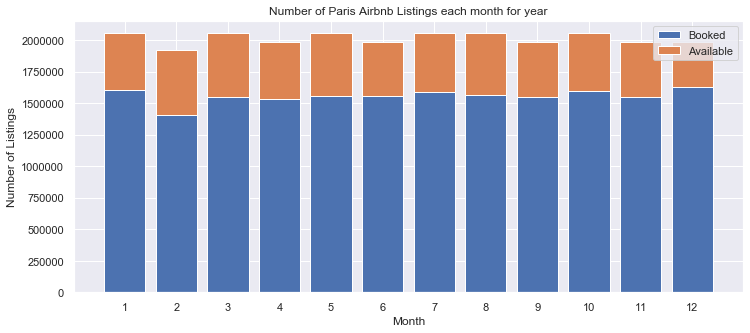

In [36]:
# use the function to visualize the number of booked and available listings per month in 2019
plot_occupancy(calendar19_df)

#### From above the graph in 2019, we can notice that the occupany rate is mostly similar between month.

### How does Covid-19 affect the market for Airbnb listings in Paris?

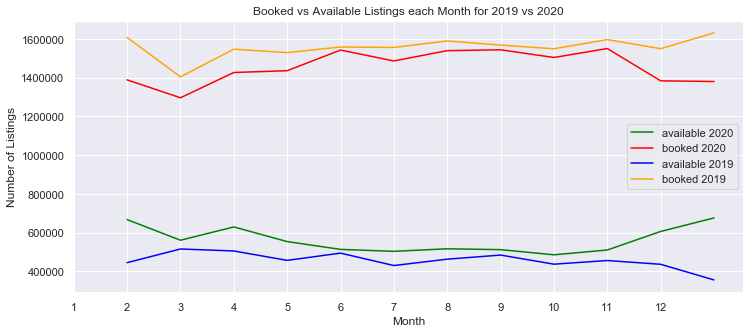

In [65]:
# Visualize Booked vs Available Listings each Month for 2019 vs 2020
plt.figure(figsize=(12,5))
plt.plot(available_20, color='green', label='available 2020')
plt.plot(booked_20, color='red', label='booked 2020')
plt.plot(available_19, color='blue', label='available 2019')
plt.plot(booked_19, color='orange', label='booked 2019')
plt.ylabel('Number of Listings')
plt.xlabel('Month')
plt.title('Booked vs Available Listings each Month for 2019 vs 2020')
plt.legend(loc='best')
plt.xticks(ind, np.arange(1, 13, 1))
plt.show()

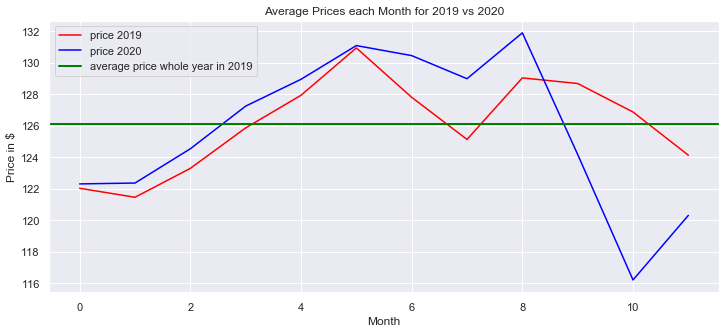

In [68]:
# Visualization the price 2019 vs 2020
grouped_price19 = calendar19_df.groupby(['month'])['price'].mean()
grouped_price19 = [i for i in grouped_price19]

grouped_price20 = calendar20_df.groupby(['month'])['price'].mean()
grouped_price20 = [i for i in grouped_price20]

# make a plot_bar
plt.figure(figsize=(12,5))
plt.plot(grouped_price19, color='red', label='price 2019')
plt.plot(grouped_price20, color='blue', label='price 2020')
plt.axhline(calendar19_df['price'].mean(), linewidth=2, color='green', label='average price whole year in 2019')
plt.ylabel('Price in $')
plt.xlabel('Month')
plt.title('Average Prices each Month for 2019 vs 2020')
plt.legend(loc='best')
plt.show()

#### Observation:
 - From listings graph 2019 vs 2020, we can notice that the number of booking in 2020 is obviously decreased in whole year compared to last year.
 - According to Average price each month for 2019 vs 2020, We could see that the average price in 2020 is falling since august 2020.
 - According to average price 2019, Average price is less expansive from November to febuary, therefore it is considerable to travel  paris in winter than in summer.
 - The results suggests that Covid-19 affected significantly to Airbnb Market in 2020 compared to last year.